# Start
anchor linls in Markdown
https://gist.github.com/asabaylus/3071099

[link to car crash](#Car-Crash-Course)

In [147]:
import requests
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import time

In [2]:
# load foursquare credentials
foursquare_cred = pd.read_csv('foursquare_cred') # saved locally and ignored in .gitignore

CLIENT_ID = foursquare_cred.CLIENT_ID[0] # your Foursquare ID
CLIENT_SECRET = foursquare_cred.CLIENT_SECRET[0] # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

LocationIQ api docs - https://locationiq.com/docs#forward-geocoding   

Region 1: US  
GET https://us1.locationiq.com/v1/search.php?key=YOUR_PRIVATE_TOKEN&q=SEARCH_STRING&format=json

Region 2: Europe    
GET https://eu1.locationiq.com/v1/search.php?key=YOUR_PRIVATE_TOKEN&q=SEARCH_STRING&format=json


In [3]:
# LocationIQ apikey
apikey = pd.read_table('locationiq_api_key',header=None).iloc[0,0]

In [10]:
# Search / Forward Geocoding url
query = 'Paris'
region = 'eu' # us or eu
search_url = "https://{}1.locationiq.com/v1/search.php".format(region)
data = {'key': apikey,'q': query,'format': 'json'}
LIQresponse = requests.get(search_url, params=data)

In [11]:
LIQresponse.json()

[{'boundingbox': ['48.8155755', '48.902156', '2.224122', '2.4697602'],
  'class': 'place',
  'display_name': 'Paris, Ile-de-France, Metropolitan France, France',
  'icon': 'https://locationiq.org/static/images/mapicons/poi_place_city.p.20.png',
  'importance': 0.97893459932191,
  'lat': '48.8566101',
  'licence': '© LocationIQ.com CC BY 4.0, Data © OpenStreetMap contributors, ODbL 1.0',
  'lon': '2.3514992',
  'osm_id': '7444',
  'osm_type': 'relation',
  'place_id': '200333750',
  'type': 'city'},
 {'boundingbox': ['48.8155755', '48.902156', '2.224122', '2.4697602'],
  'class': 'boundary',
  'display_name': 'Paris, Ile-de-France, Metropolitan France, France',
  'icon': 'https://locationiq.org/static/images/mapicons/poi_boundary_administrative.p.20.png',
  'importance': 0.97893459932191,
  'lat': '48.85881005',
  'licence': '© LocationIQ.com CC BY 4.0, Data © OpenStreetMap contributors, ODbL 1.0',
  'lon': '2.32003101155031',
  'osm_id': '71525',
  'osm_type': 'relation',
  'place_id':

In [12]:
# Search / Forward Geocoding url
city = 'Paris'
country = 'France'
region = 'eu' # us or eu
search_url = "https://{}1.locationiq.com/v1/search.php".format(region)
data = {'key': apikey,'city': city,'country':country,'format': 'json'}
LIQresponse = requests.get(search_url, params=data)

In [19]:
LIQresponse.json()[0]['display_name']

'Paris, Ile-de-France, Metropolitan France, France'

In [38]:
## http://code.activestate.com/recipes/52308-the-simple-but-handy-collector-of-a-bunch-of-named/?in=user-97991
class Bunch:
    def __init__(self, **kwds):
        self.__dict__.update(kwds)
def CityAtt(response):
    # response from LocationIQ in json
    tmp = Bunch(name= LIQresponse.json()[0]['display_name'], 
          lat= float(LIQresponse.json()[0]['lat']), 
          lon= float(LIQresponse.json()[0]['lon']))
    return tmp

In [39]:
Paris = CityAtt(LIQresponse)

In [40]:
Paris.name,Paris.lat,Paris.lon

('Paris, Ile-de-France, Metropolitan France, France', 48.8566101, 2.3514992)

In [321]:
# map
lat = Paris.lat
lon = Paris.lon
Fmap = folium.Map(location=[float(lat), float(lon)], zoom_start=10 , control_scale = True)
Fmap

In [43]:
lat = Paris.lat
lng = Paris.lon
radius = 8000 # meters, max = 100,000 ## https://developer.foursquare.com/docs/api/venues/search
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET,VERSION,lat,lng,radius,LIMIT)
# make the GET request
FSresults = requests.get(url).json()#["response"]['groups'][0]['items']

In [47]:
FSresults['response']['groups'][0]['items']

[{'reasons': {'count': 0,
   'items': [{'reasonName': 'globalInteractionReason',
     'summary': 'This spot is popular',
     'type': 'general'}]},
  'referralId': 'e-0-4bf41231e5eba59334341f90-0',
  'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/plaza_',
      'suffix': '.png'},
     'id': '4bf58dd8d48988d164941735',
     'name': 'Plaza',
     'pluralName': 'Plazas',
     'primary': True,
     'shortName': 'Plaza'}],
   'id': '4bf41231e5eba59334341f90',
   'location': {'address': "Place de l'Hôtel de Ville",
    'cc': 'FR',
    'city': 'Paris',
    'country': 'France',
    'distance': 60,
    'formattedAddress': ["Place de l'Hôtel de Ville", '75004 Paris', 'France'],
    'lat': 48.85713761176484,
    'lng': 2.3516931321499746,
    'postalCode': '75004',
    'state': 'Île-de-France'},
   'name': "Place de l'Hôtel de Ville – Esplanade de la Libération",
   'photos': {'count': 0, 'groups': []}}},
 {'reasons': {'count': 0,
   'items': [

In [51]:
vv = [v['venue']['categories'][0]['name'] for v in FSresults['response']['groups'][0]['items']]

In [55]:
set(vv)

{'Argentinian Restaurant',
 'Art Gallery',
 'Art Museum',
 'Asian Restaurant',
 'Bakery',
 'Beer Bar',
 'Bistro',
 'Bookstore',
 'Botanical Garden',
 'Breakfast Spot',
 'Bridge',
 'Canal',
 'Cheese Shop',
 'Church',
 'Cocktail Bar',
 'Comic Shop',
 'Concert Hall',
 'Cosmetics Shop',
 'Dance Studio',
 'Dessert Shop',
 'Exhibit',
 'Farmers Market',
 'Fountain',
 'French Restaurant',
 'Furniture / Home Store',
 'Garden',
 'Historic Site',
 'Hotel',
 'Ice Cream Shop',
 'Indie Movie Theater',
 'Israeli Restaurant',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Monument / Landmark',
 'Park',
 'Pastry Shop',
 'Pedestrian Plaza',
 'Plaza',
 'Restaurant',
 'Sandwich Place',
 'Seafood Restaurant',
 'Souvenir Shop',
 'Speakeasy',
 'Tailor Shop',
 'Tapas Restaurant',
 'Theater',
 'Trattoria/Osteria',
 'Udon Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Wine Bar',
 'Wine Shop'}

here is the idea, I can have to different set of variables to compare, for instance the temperature along the year and the frequency of venue categories. They have to be separetely normalized then joined, then a weighted distance matrix can be used to compute a fair comparison, so if the same importance is given to both sets of variables, it can be like this
set A = 200 variables
set B = 12 variables
weights for A = 1/200 for each
weights for A = 1/12 for each
https://stackoverflow.com/questions/20089007/calculate-weighted-pairwise-distance-matrix-in-python


In [4]:
from scipy.spatial.distance import pdist, wminkowski, squareform
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

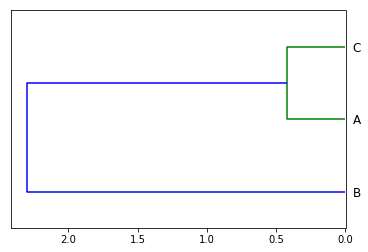

In [240]:
labels = ['A','B','C']
x = np.array([[1,2,3],[2,3,4],[1,2,6]])
#dx = pdist(x)
dx = pdist(x,wminkowski,2,[1,1,0.1])
cdx = squareform(dx)
# https://docs.scipy.org/doc/scipy-0.18.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram
# https://stackoverflow.com/questions/35873273/display-cluster-labels-for-a-scipy-dendrogram
ccdx = hierarchy.single(cdx)
plt.figure()
R = hierarchy.dendrogram(ccdx,no_plot=True)
# create a label dictionary
temp = {R["leaves"][ii]: labels[ii] for ii in range(len(R["leaves"]))}
def llf(xx):
    return "{} - custom label!".format(temp[xx])
hierarchy.dendrogram(
            ccdx,
            labels=labels,
            orientation = 'left',
#            leaf_label_func=llf,
            )
plt.show()

In [101]:
from bs4 import BeautifulSoup
import requests
import re

In [102]:
url = "https://en.wikipedia.org/wiki/List_of_European_cities_by_temperature"
page = requests.get(url)

soup = BeautifulSoup(page.content,'html.parser')
# selected using selector gadget
#header .headerSort
#table td

In [103]:
#headers 
cols = [x.get_text().replace('\n','') for x in soup.select('th')][:-1]

In [104]:
tb_content = [re.sub("\(.*\)",'',x.get_text().replace('\n','') )  for x in soup.select('td')]

In [105]:
# the extraction is a function of len(cols) and len(tb_content) 
## it works even in these case, where the actual #of cols is 16 but I want just the first 15 cols
### but, for it to work, the tb_content needs to be split by the original number of cols, 16

ttable = pd.DataFrame()
for i in range(15):
    ttable[cols[i]] = [tb_content[x] for x in np.arange(i,len(tb_content),16)]
ttable.head()

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,Austria,Vienna,0.3,1.5,5.7,10.7,15.7,18.7,20.8,20.2,15.4,10.2,5.1,1.1,10.4
1,Belgium,Brussels,3.3,3.7,6.8,9.8,13.6,16.2,18.4,18.0,14.9,11.1,6.8,3.9,10.5
2,Bulgaria,Sofia,−0.5,1.1,5.4,10.6,15.4,18.9,21.2,21.0,16.5,11.3,5.1,0.7,10.6
3,Croatia,Zagreb,0.3,2.3,6.4,10.7,15.8,18.8,20.6,20.1,15.9,10.5,5.0,1.4,10.7
4,Czech Republic,Prague,−1.4,−0.4,3.6,8.4,13.4,16.1,18.2,17.8,13.5,8.5,3.1,−0.3,8.4


In [106]:
# the character used in the wikipedia table for minus is "−", which is not the same as "-", 
# they look the same but they are not 
# the ord function returns the Unicode code point for a one-character string.
print("character in the wikipedia table: ", ord("−")) 
print("minus character:",ord("-"))
try:
    res = float('−0.5')
except:
    res = 'error'
print("this won't work, float('−0.5'):",res)
print("this works, float('-0.5'):",float('-0.5'))


character in the wikipedia table:  8722
minus character: 45
this won't work, float('−0.5'): error
this works, float('-0.5'): -0.5


In [107]:
# converting the values from string to float, after replacing the problematic character
ttable.iloc[:,2:] = ttable.iloc[:,2:].apply(lambda x: x.str.replace('−','-').astype('float'))

In [109]:
ttable.to_csv('temp_table.csv')

In [5]:
from sklearn.preprocessing import StandardScaler 

In [301]:
Data = [[1,2,3,4],[10,20,30,40]]

In [305]:
StandardScaler().fit_transform(Data)#.transform(Data)

array([[-1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1.]])

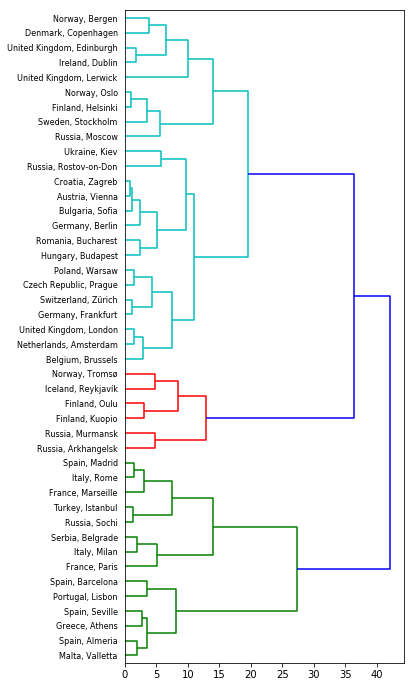

In [307]:
from scipy.spatial.distance import pdist, wminkowski, squareform
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# labels = ttable.City.values
labels = ['{}, {}'.format(ttable.Country[i],ttable.City[i]) for i in range(len(ttable.City.values))]
x = ttable.iloc[:,2:-1].astype('float').values

# there is no big difference if the temp is scaled when only temp is compared, 
## but it prevents from temp dominance in face of other metrics
x = StandardScaler().fit_transform(x)

dx = pdist(x)
#dx = pdist(x,wminkowski,2,[1,1,0.1])
cdx = squareform(dx)
ccdx = hierarchy.complete(cdx)
plt.figure(figsize=(5,12))

R = hierarchy.dendrogram(ccdx,labels=labels,orientation='right')

# R = hierarchy.dendrogram(ccdx,no_plot=True)
# # create a label dictionary
# temp = {R["leaves"][ii]: '{}, {}'.format(ttable.Country[ii],ttable.City[ii]) for ii in range(len(R["leaves"]))}
# def llf(xx):
#     return temp[xx]
# hierarchy.dendrogram(
#             ccdx,
# #            labels=labels,
#             orientation = 'right',
#             leaf_label_func=llf,
#             )
plt.show()


In [378]:
ccs = hierarchy.cut_tree(ccdx,8)
ccsv = [x[0] for x in ccs.tolist()] # just use np.array.flatten()
ttable_c = ttable.copy()
ttable_c['Cluster'] = ccsv

In [380]:
#ll.sort_values(by='Cluster')
ttable_c.loc[ttable_c.Cluster==6]

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Cluster
13,Greece,Athens,9.9,10.2,12.5,15.7,20.5,25.5,28.5,28.6,24.1,19.5,15.1,11.7,18.5,6
19,Malta,Valletta,12.2,12.4,13.4,15.5,19.1,23,25.9,26.3,24.1,20.7,17,13.8,18.62,6
25,Portugal,Lisbon,11.6,12.7,14.9,15.9,18,21.2,23.1,23.5,22.1,18.8,15,12.4,17.5,6
33,Spain,Almeria,12.6,13.3,15.1,17,19.7,23.5,26.1,26.7,24.2,20.4,16.4,13.8,19.1,6
34,Spain,Barcelona,11.8,12.4,14.2,15.8,19.3,23,25.7,26.1,23,19.5,14.9,12.3,18.2,6
35,Spain,Seville,10.9,12.5,15.6,17.3,20.7,25.1,28.2,27.9,25,20.2,15.1,11.9,19.2,6


In [342]:
region = 'eu' # us or eu
search_url = "https://{}1.locationiq.com/v1/search.php".format(region)

ll=[]
for i in range(len(ttable.City)):
    country = ttable.Country[i]
    city = ttable.City[i]
    data = {'key': apikey,'city': city,'country':country,'format': 'json'}
    LIQresponse = requests.get(search_url, params=data)
    lat= LIQresponse.json()[0]['lat']
    lon=LIQresponse.json()[0]['lon']
    name=LIQresponse.json()[0]['display_name']
    ll.append([country,city,lat,lon,name])
    time.sleep(1)

In [345]:
lltable = pd.DataFrame(ll,columns='Country,City,lat,lon,display_name'.split(','))
lltable.head()

,Country,City,lat,lon,display_name
0,Austria,Vienna,48.2083537,16.3725042,"Vienna, 1010, Austria"
1,Belgium,Brussels,50.8465573,4.351697,"Brussels, Brussels-Capital, 1000, Belgium"
2,Bulgaria,Sofia,42.6978634,23.3221789,"Sofia, Sofia City, Sofia-City, 1000, Bulgaria"
3,Croatia,Zagreb,45.813177,15.977048,"Zagreb, City of Zagreb, Croatia"
4,Czech Republic,Prague,50.0874654,14.4212535,"Prague, okres Hlavní město Praha, Hlavní město..."


In [374]:
lltable.loc[:,['lat','lon']] = lltable.loc[:,['lat','lon']].astype('float')

In [394]:
temp_ll_table = pd.merge(lltable.drop('display_name',axis=1), ttable_c).sort_values(by='Cluster')
temp_ll_table.head()

,Country,City,lat,lon,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Cluster
0,Austria,Vienna,48.2084,16.3725,0.3,1.5,5.7,10.7,15.7,18.7,20.8,20.2,15.4,10.2,5.1,1.1,10.4,0
40,Ukraine,Kiev,50.4501,30.5241,-3.5,-3,1.8,9.3,15.5,18.5,20.5,19.7,14.2,8.4,1.9,-2.3,8.4,0
38,Switzerland,Zürich,47.3769,8.54141,0.3,1.3,5.3,8.8,13.3,16.4,18.6,18,14.1,9.9,4.4,1.4,9.3,0
30,Russia,Rostov-on-Don,47.2247,39.7165,-3,-2.8,2.4,10.6,16.6,21,23.4,22.6,16.7,10,2.9,-1.6,9.9,0
26,Romania,Bucharest,44.4361,26.1027,-1.3,0.4,5.4,11.2,16.8,20.6,22.5,22,16.9,11,4.7,0.2,10.8,0


In [149]:
# map
lat = 55
lon = 12.102151
Fmap = folium.Map(location=[float(lat), float(lon)], zoom_start=3 , control_scale = True)

#df=lltable
df=tllj_table2
# add markers to map
for lat, lng, city, country in zip(df['lat'], df['lon'], df['City'], df['Country']):
    label = '{}, {}'.format(city, country)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(  # Circle makes a difined size circle, CircleMarker makes a circle of the same size in all zooms
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Fmap)  
Fmap

In [470]:
city = lltable.loc[i,'City']
country = lltable.loc[i,'Country']
careerjet_baseurl='https://www.careerjet.com.mt/wsearch/jobs?s=data+scientist&l='
res = requests.get(careerjet_baseurl+city+'%2C+'+country)
print(city,country,sep=', ')
re.findall(r'class="display_results display_inline"><nobr>.+of (.+?) jobs</nobr>',str(res.content))

Vienna, Austria


['43']

In [497]:
i = 15
city = lltable.loc[i,'City']
country = lltable.loc[i,'Country']
print(city,country,sep=', ')
lkres = requests.get(linkedin_baseurl+city+'%2C'+country)
lk = re.findall(r'"total":(.+?),"links"',str(lkres.content)) 
lk

Reykjavík, Iceland


['0']

In [500]:
jtable=[] # jobs table
linkedin_baseurl='https://www.linkedin.com/jobs/search/?keywords=data%20scientist&location='
careerjet_baseurl='https://www.careerjet.com.mt/wsearch/jobs?s=data+scientist&l='

for i in range(lltable.shape[0]):
    city = lltable.loc[i,'City']
    country = lltable.loc[i,'Country']
    print(i,'-',city,'-',country,end='\r')
    # get number of linkedin jobs
    lk=[]; attempt = 1 
    while lk == [] and attempt < 5:
        attempt+=1
        lkres = requests.get(linkedin_baseurl+city+'%2C'+country)
        lk = re.findall(r'"total":(.+?),"links"',str(lkres.content))
        if lk == []:
            time.sleep(1)
    # get number of careerjet jobs
    cj=[]; attempt = 1 
    while cj == [] and attempt < 5:
        attempt+=1
        cjres = requests.get(careerjet_baseurl+city+'%2C+'+country)
        cj = re.findall(r'class="display_results display_inline"><nobr>.+of (.+?) jobs</nobr>',str(cjres.content))
        if lk == []:
            time.sleep(1)
    # append to list
    jtable.append([city,country,lk,cj])

In [504]:
jdf = pd.DataFrame(jtable,columns='City,Country,lk,cj'.split(','))

In [520]:
def takedata(x):
    if x == []:
        return 0
    else:
        return int(x[0])
jjdf = jdf.iloc[:,2:].applymap(lambda x: takedata(x))

In [ ]:
pd.concat([jdf[['Country','City']],jjdf],axis=1).to_csv('scraped_jobs.csv')

In [ ]:
# another source 
# https://opendatascience.com/what-are-the-best-european-cities-for-jobs-in-data-science/
# london and Paris are the 2 biggest in that too

In [532]:
jjdf2 = jjdf.apply(lambda x: x/x.max(), axis=0).mean(axis=1)
jjdf3 = jjdf2/jjdf2.sum()

In [558]:
jobs_table = jdf.loc[:,['City','Country']]
jobs_table['job_index'] = jjdf3
# remove cities with 0 index
jobs_table2 = jobs_table.loc[jobs_table.job_index>0].reset_index()
jobs_table2.head()

,index,City,Country,job_index
0,0,Vienna,Austria,0.013473
1,1,Brussels,Belgium,0.026945
2,2,Sofia,Bulgaria,0.003868
3,3,Zagreb,Croatia,0.000362
4,4,Prague,Czech Republic,0.010814


In [ ]:
# join temp and jobs

In [555]:
tllj_table = pd.merge(temp_ll_table,jobs_table2)

In [566]:
# test the merge
tllj_table['index,City,Country,job_index'.split(',')].sort_values(by='index').reset_index(drop=True).equals(jobs_table2)

True

In [569]:
tllj_table2 = tllj_table.drop('index',axis=1)

In [570]:
tllj_table2.to_csv('tllj_table2.csv')

In [597]:
tllj_table2.head()

,Country,City,lat,lon,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Cluster,job_index
0,Austria,Vienna,48.2084,16.3725,0.3,1.5,5.7,10.7,15.7,18.7,20.8,20.2,15.4,10.2,5.1,1.1,10.4,0,0.013473
1,Ukraine,Kiev,50.4501,30.5241,-3.5,-3,1.8,9.3,15.5,18.5,20.5,19.7,14.2,8.4,1.9,-2.3,8.4,0,0.010510
2,Switzerland,Zürich,47.3769,8.54141,0.3,1.3,5.3,8.8,13.3,16.4,18.6,18,14.1,9.9,4.4,1.4,9.3,0,0.030155
3,Romania,Bucharest,44.4361,26.1027,-1.3,0.4,5.4,11.2,16.8,20.6,22.5,22,16.9,11,4.7,0.2,10.8,0,0.008451
4,Poland,Warsaw,52.2319,21.0067,-1.8,-0.6,2.8,8.7,14.2,17,19.2,18.3,13.5,8.5,3.3,-0.7,8.5,0,0.022389


In [9]:
tllj_table2 = pd.read_csv('tllj_table2.csv',index_col=0)
tllj_table2.head()

,Country,City,lat,lon,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Cluster,job_index
0,Austria,Vienna,48.208354,16.372504,0.3,1.5,5.7,10.7,15.7,18.7,20.8,20.2,15.4,10.2,5.1,1.1,10.4,0,0.013473
1,Ukraine,Kiev,50.450107,30.524050,-3.5,-3.0,1.8,9.3,15.5,18.5,20.5,19.7,14.2,8.4,1.9,-2.3,8.4,0,0.010510
2,Switzerland,Zürich,47.376943,8.541406,0.3,1.3,5.3,8.8,13.3,16.4,18.6,18.0,14.1,9.9,4.4,1.4,9.3,0,0.030155
3,Romania,Bucharest,44.436141,26.102720,-1.3,0.4,5.4,11.2,16.8,20.6,22.5,22.0,16.9,11.0,4.7,0.2,10.8,0,0.008451
4,Poland,Warsaw,52.231924,21.006727,-1.8,-0.6,2.8,8.7,14.2,17.0,19.2,18.3,13.5,8.5,3.3,-0.7,8.5,0,0.022389


In [593]:
x = tllj_table2.iloc[:,-1].values
squareform(pdist(x.reshape(len(x),1)))

array([[0.        , 0.00296229, 0.01668224, ..., 0.01287092, 0.00963764,
        0.00695208],
       [0.00296229, 0.        , 0.01964453, ..., 0.00990863, 0.01259993,
        0.00398978],
       [0.01668224, 0.01964453, 0.        , ..., 0.02955316, 0.0070446 ,
        0.02363431],
       ...,
       [0.01287092, 0.00990863, 0.02955316, ..., 0.        , 0.02250856,
        0.00591884],
       [0.00963764, 0.01259993, 0.0070446 , ..., 0.02250856, 0.        ,
        0.01658971],
       [0.00695208, 0.00398978, 0.02363431, ..., 0.00591884, 0.01658971,
        0.        ]])

In [588]:
np.array([1,2,3,4]).reshape(4,1)

array([[1],
       [2],
       [3],
       [4]])

In [584]:
squareform(pdist(np.array([[1],[1],[1]])))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

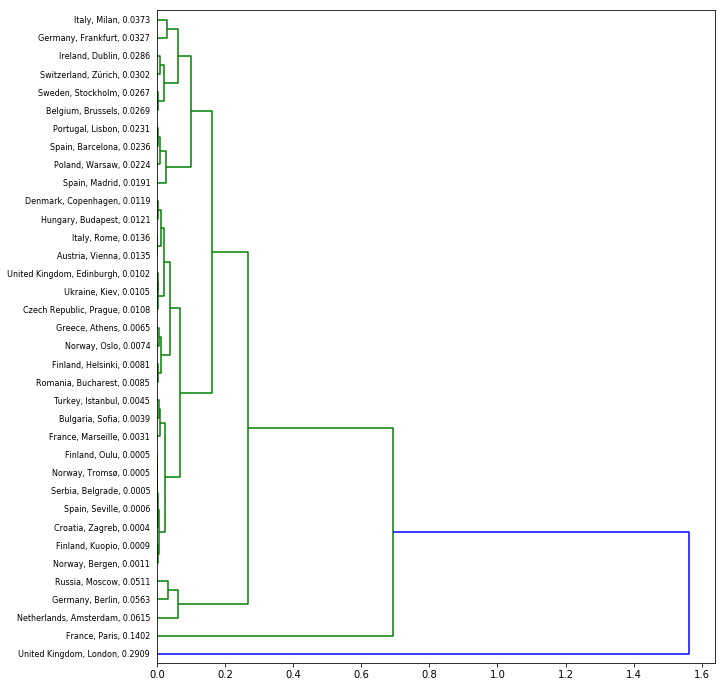

In [12]:
# labels = ttable.City.values
df = tllj_table2
labels = ['{}, {}, {:.4f}'.format(df.Country[i],df.City[i],df.job_index[i]) for i in range(len(df.City.values))]
x = tllj_table2.iloc[:,-1].values
# data is already normalized
# x = StandardScaler().fit_transform(x)

dx = pdist(x.reshape(len(x),1))  # pdist needs a 2D array, so I need to reshape the 1D array to a nested like [[1],[2],[3]]
#dx = pdist(x,wminkowski,2,[1,1,0.1])
cdx = squareform(dx)
ccdx = hierarchy.complete(cdx)
plt.figure(figsize=(10,12))

R = hierarchy.dendrogram(ccdx,labels=labels,orientation='right')

plt.show()

In [14]:
hierarchy.cut_tree(ccdx,height=0.1).flatten()

array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 4, 1, 1, 0, 1, 0])

In [19]:
jcl = pd.DataFrame({'job_cluster':hierarchy.cut_tree(ccdx,height=0.1).flatten()})
pd.concat([tllj_table2,jcl],axis=1).sort_values(by='job_cluster')

,Country,City,lat,lon,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Cluster,job_index,job_cluster
0,Austria,Vienna,48.208354,16.372504,0.3,1.5,5.7,10.7,15.7,18.7,20.8,20.2,15.4,10.2,5.1,1.1,10.4,0,0.013473,0
33,Spain,Seville,37.388630,-5.995317,10.9,12.5,15.6,17.3,20.7,25.1,28.2,27.9,25.0,20.2,15.1,11.9,19.2,6,0.000602,0
29,Serbia,Belgrade,44.817813,20.456897,1.4,3.1,7.6,12.9,18.1,21.0,23.0,22.7,18.0,12.9,7.1,2.7,12.5,5,0.000543,0
28,Italy,Rome,41.894802,12.485338,7.5,8.2,10.2,12.6,17.2,21.1,24.1,24.5,20.8,16.4,11.4,8.4,15.2,4,0.013595,0
27,France,Marseille,43.296174,5.369953,8.4,8.9,11.6,13.8,17.9,21.3,24.5,24.1,20.7,16.9,11.8,9.3,15.8,4,0.003104,0
25,Turkey,Istanbul,41.009633,28.965165,5.7,5.7,7.0,11.1,15.7,20.4,22.9,23.1,19.8,15.6,11.5,8.0,13.9,4,0.004531,0
24,Finland,Oulu,65.011873,25.471681,-9.6,-9.3,-4.8,1.4,7.8,13.5,16.5,14.1,8.9,3.3,-2.8,-7.1,2.7,3,0.000543,0
23,Norway,Tromsø,69.649297,18.954849,-3.8,-3.7,-2.3,0.7,5.1,9.2,11.8,10.9,6.9,3.2,-0.6,-2.7,2.9,3,0.000543,0
22,Finland,Kuopio,62.824142,27.594561,-9.2,-9.2,-4.1,2.0,9.1,14.5,17.5,15.0,9.7,4.1,-2.0,-6.7,3.4,3,0.000906,0
21,Finland,Helsinki,60.167409,24.942568,-3.9,-4.7,-1.3,3.9,10.2,14.6,17.8,16.3,11.5,6.6,1.6,-2.0,5.9,2,0.008131,0


In [75]:
# jan=tllj_table2.columns.get_loc('Jan')
# tllj_table2.columns[[x for x in range(jan,jan+12)]+[18]]
# #tllj_table2.iloc[:,]
months = tllj_table2.columns[4:16].tolist()
tllj_table2.loc[:,months+['job_index']].values
# ws=[0.5/12]*12 #0.5 weight for temp
# ws.extend([0.5]) #0.5 weight for jobs


array([[ 3.00000000e-01,  1.50000000e+00,  5.70000000e+00,
         1.07000000e+01,  1.57000000e+01,  1.87000000e+01,
         2.08000000e+01,  2.02000000e+01,  1.54000000e+01,
         1.02000000e+01,  5.10000000e+00,  1.10000000e+00,
         1.34727724e-02],
       [-3.50000000e+00, -3.00000000e+00,  1.80000000e+00,
         9.30000000e+00,  1.55000000e+01,  1.85000000e+01,
         2.05000000e+01,  1.97000000e+01,  1.42000000e+01,
         8.40000000e+00,  1.90000000e+00, -2.30000000e+00,
         1.05104780e-02],
       [ 3.00000000e-01,  1.30000000e+00,  5.30000000e+00,
         8.80000000e+00,  1.33000000e+01,  1.64000000e+01,
         1.86000000e+01,  1.80000000e+01,  1.41000000e+01,
         9.90000000e+00,  4.40000000e+00,  1.40000000e+00,
         3.01550093e-02],
       [-1.30000000e+00,  4.00000000e-01,  5.40000000e+00,
         1.12000000e+01,  1.68000000e+01,  2.06000000e+01,
         2.25000000e+01,  2.20000000e+01,  1.69000000e+01,
         1.10000000e+01,  4.70000000e

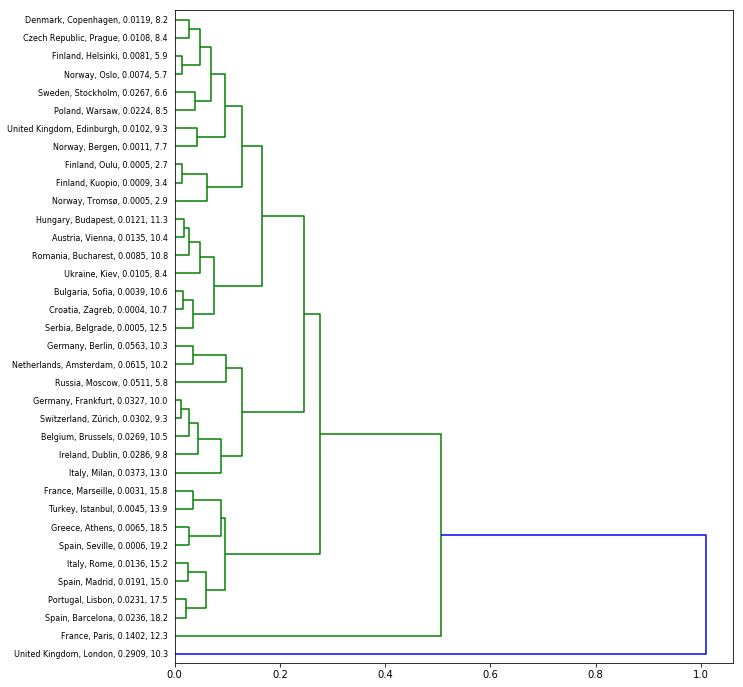

In [164]:
# labels = ttable.City.values
df = tllj_table2
labels = ['{}, {}, {:.4f}, {}'.format(df.Country[i],df.City[i],df.job_index[i],df.Year[i]) for i in range(len(df.City.values))]
x = tllj_table2.loc[:,months+['job_index']].values
# jobs data is already normalized by max, but we can norm all by min max

from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit(x).transform(x)

ws=[1/12]*12 #0.5 weight for temp
ws.extend([1]) #0.5 weight for jobs

dx = pdist(X,wminkowski,2,ws)
#cdx = squareform(dx)
ccdx = hierarchy.complete(dx)
plt.figure(figsize=(10,12))

R = hierarchy.dendrogram(ccdx,labels=labels,orientation='right')

plt.show()

Text(0.025, 0.975, 'figure fraction')

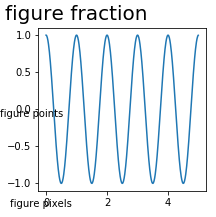

In [178]:
# Create our figure and data we'll use for plotting
fig, ax = plt.subplots(figsize=(3, 3))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

# Plot a line and add some simple annotations
line, = ax.plot(t, s)
ax.annotate('figure pixels',
            xy=(10, 10), xycoords='figure pixels')
ax.annotate('figure points',
            xy=(0, 100), xycoords='figure points')
ax.annotate('figure fraction',
            xy=(.025, .975), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)

In [159]:
from sklearn.manifold import MDS
mds = MDS(random_state=123,dissimilarity="precomputed").fit(squareform(dx)).embedding_

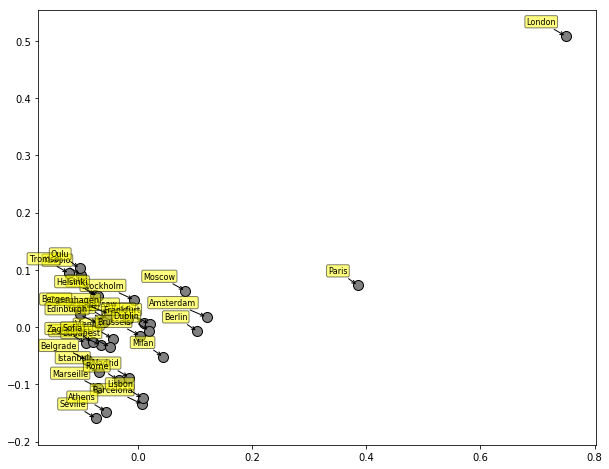

In [160]:
fig = plt.figure(figsize=(10,8))
plt.scatter(mds[:, 0], mds[:, 1], facecolor='gray',edgecolor='black',s=100)
for label, x, y in zip(df.City.values, mds[:, 0], mds[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        fontsize=8,
        bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()

In [209]:
from sklearn.cluster import DBSCAN 
dbcs=DBSCAN(eps=0.025,min_samples=2,metric='precomputed').fit(squareform(dx)).labels_
pd.DataFrame({'city':df.City.values,'cl':dbcs}).sort_values(by='cl',ascending=False)

,city,cl
34,Lisbon,4
32,Barcelona,4
24,Oulu,3
22,Kuopio,3
18,Oslo,2
21,Helsinki,2
2,Zürich,1
7,Frankfurt,1
10,Zagreb,0
12,Sofia,0


# Car Crash Course
[start](#Start)

URL list from Friday, Dec. 21 2018 23:19 PM
To copy this list, type [Ctrl] A, then type [Ctrl] C. 

Capstone Project - The Battle of Neighborhoods (Week 1) | Coursera
https://www.coursera.org/learn/applied-data-science-capstone/peer/60zST/capstone-project-the-battle-of-neighborhoods-week-1/submit

Github Markdown Heading Anchors
https://gist.github.com/asabaylus/3071099

python - Display cluster labels for a scipy dendrogram - Stack Overflow
https://stackoverflow.com/questions/35873273/display-cluster-labels-for-a-scipy-dendrogram

List of European cities by temperature - Wikipedia
https://en.wikipedia.org/wiki/List_of_European_cities_by_temperature

When to use weighted Euclidean distance and how to determine the weights to use? - Cross Validated
https://stats.stackexchange.com/questions/15289/when-to-use-weighted-euclidean-distance-and-how-to-determine-the-weights-to-use

Hierarchical clustering (scipy.cluster.hierarchy) — SciPy v0.18.0 Reference Guide
https://docs.scipy.org/doc/scipy-0.18.0/reference/cluster.hierarchy.html

scipy.cluster.hierarchy.dendrogram — SciPy v0.18.0 Reference Guide
https://docs.scipy.org/doc/scipy-0.18.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram

scipy.cluster.hierarchy.single — SciPy v0.18.0 Reference Guide
https://docs.scipy.org/doc/scipy-0.18.0/reference/generated/scipy.cluster.hierarchy.single.html#scipy.cluster.hierarchy.single

scipy.cluster.hierarchy.fclusterdata — SciPy v0.18.0 Reference Guide
https://docs.scipy.org/doc/scipy-0.18.0/reference/generated/scipy.cluster.hierarchy.fclusterdata.html#scipy.cluster.hierarchy.fclusterdata

python - Use Distance Matrix in scipy.cluster.hierarchy.linkage()? - Stack Overflow
https://stackoverflow.com/questions/18952587/use-distance-matrix-in-scipy-cluster-hierarchy-linkage

Use pdist() in python with a custom distance function defined by you - Stack Overflow
https://stackoverflow.com/questions/36422949/use-pdist-in-python-with-a-custom-distance-function-defined-by-you

scipy.spatial.distance.pdist — SciPy v0.17.0 Reference Guide
https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist

numpy.array — NumPy v1.15 Manual
https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.array.html

numpy - Calculate weighted pairwise distance matrix in Python - Stack Overflow
https://stackoverflow.com/questions/20089007/calculate-weighted-pairwise-distance-matrix-in-python

hierarchy.dendrogram plt set label - Google Search
https://www.google.pt/search?q=hierarchy.dendrogram+plt+set+label&oq=hierarchy.dendrogram+plt+set+label&aqs=chrome..69i57.12325j1j7&sourceid=chrome&ie=UTF-8

#401 Customised dendrogram – The Python Graph Gallery
https://python-graph-gallery.com/401-customised-dendrogram/
